In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../utils')
from dataPiping import *

import numpy as np
import pandas as pd
from math import exp, fabs, sqrt, log, pi
import datetime

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import Callback
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
seed = 42
np.random.seed(seed)

### Load data

In [6]:
X, y = readAggrData()
X_train, X_test, y_train, y_test = splitAndNormaliseAggr(X,y)

In [28]:
class NBatchLogger(Callback):
    def __init__(self,display=100):
        '''
        display: Number of batches to wait before outputting loss
        '''
        self.seen = 0
        self.display = display

    def on_batch_end(self,batch,logs={}):
        self.seen += logs.get('size', 0)
        if self.seen % self.display == 0:
            print('\n{0}/{1} - Batch Loss: {2}'.format(self.seen,self.params['nb_sample'],
                                                self.params['metrics'][0]))

### Define model

In [9]:
def baseline_model():
    model = Sequential()
    model.add(Dense(X.shape[1], input_dim=X.shape[1], init='normal', activation='relu'))
    model.add(Dense(1, init='normal')) # no activation/linear activation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [10]:
nn_bl = baseline_model()

In [38]:
hist = nn_bl.fit(
    X_train, y_train,
    batch_size=1000, nb_epoch=100000, 
    verbose=0
    #, callbacks=[NBatchLogger()]
)

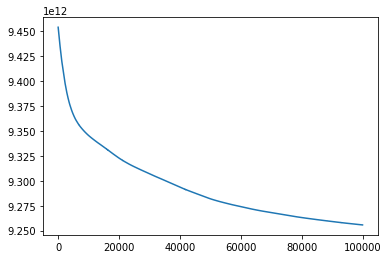

In [39]:
plt.plot(hist.history['loss'])

In [61]:
rmse = sqrt(mean_squared_error(y_test, nn_bl.predict(X_test)))
str(datetime.timedelta(seconds=rmse))

'35 days, 19:40:15.880325'

## Wider topology 

In [58]:
def wide_model():
    model = Sequential()
    model.add(Dense(20, input_dim=X.shape[1], init='normal', activation='relu'))
    model.add(Dense(1, init='normal')) # no activation/linear activation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [64]:
nn_bl2 = wide_model()

In [ ]:
hist = nn_bl2.fit(
    X_train, y_train,
    batch_size=1000, nb_epoch=100000, 
    verbose=0
    #, callbacks=[NBatchLogger()]
)

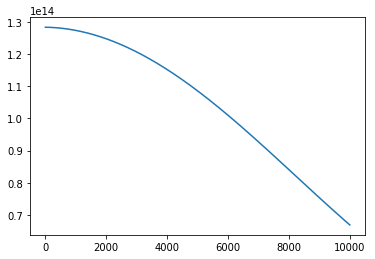

In [62]:
plt.plot(hist.history['loss'])

In [63]:
rmse = sqrt(mean_squared_error(y_test, nn_bl2.predict(X_test)))
str(datetime.timedelta(seconds=rmse))

'94 days, 23:17:06.749802'